# Disambiguation with non-orthogonal sequences

In [3]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect, TimedInput
from connectivity_functions import create_orthogonal_canonical_representation, build_network_representation
from connectivity_functions import get_weights_from_probabilities, get_probabilities_from_network_representation
from analysis_functions import calculate_recall_time_quantities, get_weights
from analysis_functions import get_weights_collections
from plotting_functions import plot_network_activity_angle, plot_weight_matrix

In [4]:
epsilon = 10e-20

## Create an example with two sequences

In [5]:
def produce_overlaped_sequences(minicolumns, hypercolumns, n_patterns, s, r, mixed_start=False, contiguous=True):
    
    n_r = int(r * n_patterns/2)
    n_s = int(s * hypercolumns)
    n_size = int(n_patterns / 2)

    matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)[:n_patterns]
    sequence1 = matrix[:n_size]
    sequence2 = matrix[n_size:]
 
    if mixed_start:
        start_index = 0
        end_index = n_r 
    else:
        start_index = max(int(0.5 * (n_size - n_r)), 0)
        end_index = min(start_index + n_r, n_size)
    
    for index in range(start_index, end_index):
        if contiguous:
            sequence2[index, :n_s] = sequence1[index, :n_s]
        else:
            sequence2[index, ...] = sequence1[index, ...]
            sequence2[index, n_s:] = n_patterns + index 
        
    if False:
        print(n_r)
        print(n_size)
        print(start_index)
        print(end_index)
           
    return sequence1, sequence2

array([[10, 10, 10, 10],
       [11, 11, 11, 11],
       [12, 12, 12, 12],
       [13, 13, 13, 13],
       [ 4,  4, 14, 14],
       [15, 15, 15, 15],
       [16, 16, 16, 16],
       [17, 17, 17, 17],
       [18, 18, 18, 18],
       [19, 19, 19, 19]])


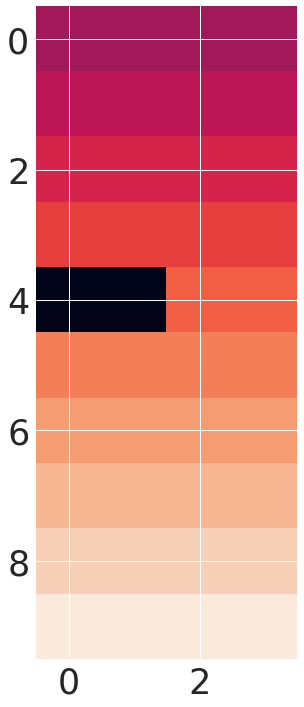

In [6]:
minicolumns = 20
n_patterns = 20
hypercolumns = 4

mixed_start = False
contiguous = True
s = 0.5
r = 0.1

seq1, seq2 = produce_overlaped_sequences(minicolumns, hypercolumns, n_patterns, s, r, 
                                         mixed_start=mixed_start, contiguous=contiguous)
pprint.pprint(seq2)
plt.imshow(seq2);

In [7]:
seq1

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8],
       [9, 9, 9, 9]])

In [8]:
nr1 = build_network_representation(seq1, minicolumns, hypercolumns)
nr2 = build_network_representation(seq2, minicolumns, hypercolumns)

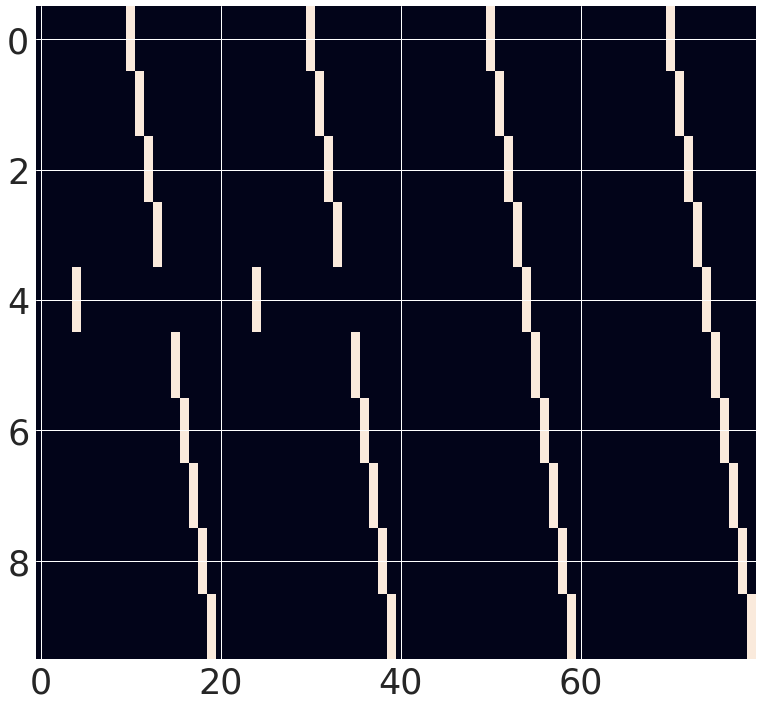

In [9]:
plt.imshow(nr2, aspect='auto')

## An example
Let's make a network that can learn this example

In [121]:
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.025
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 3
minicolumns = 30
n_patterns = 20

# Manager properties
dt = 0.001
values_to_save = ['o', 'i_ampa', 'a']

# Protocol
training_time = 0.100
inter_sequence_interval = 0.0
inter_pulse_interval = 0.0
epochs = 1

# Recall
T_recall = 1.0
n = 1
T_cue = 0.050

matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
mixed_start = False
contiguous = True
s = 1.0
r = 0.25

seq1, seq2 = produce_overlaped_sequences(minicolumns, hypercolumns, n_patterns, s, r, 
                                         mixed_start=mixed_start, contiguous=contiguous)

nr1 = build_network_representation(seq1, minicolumns, hypercolumns)
nr2 = build_network_representation(seq2, minicolumns, hypercolumns)

In [122]:
-

In [123]:
seq2

array([[10, 10, 10],
       [11, 11, 11],
       [12, 12, 12],
       [13, 13, 13],
       [ 4,  4,  4],
       [ 5,  5,  5],
       [16, 16, 16],
       [17, 17, 17],
       [18, 18, 18],
       [19, 19, 19]])

In [124]:
seq1

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5],
       [6, 6, 6],
       [7, 7, 7],
       [8, 8, 8],
       [9, 9, 9]])

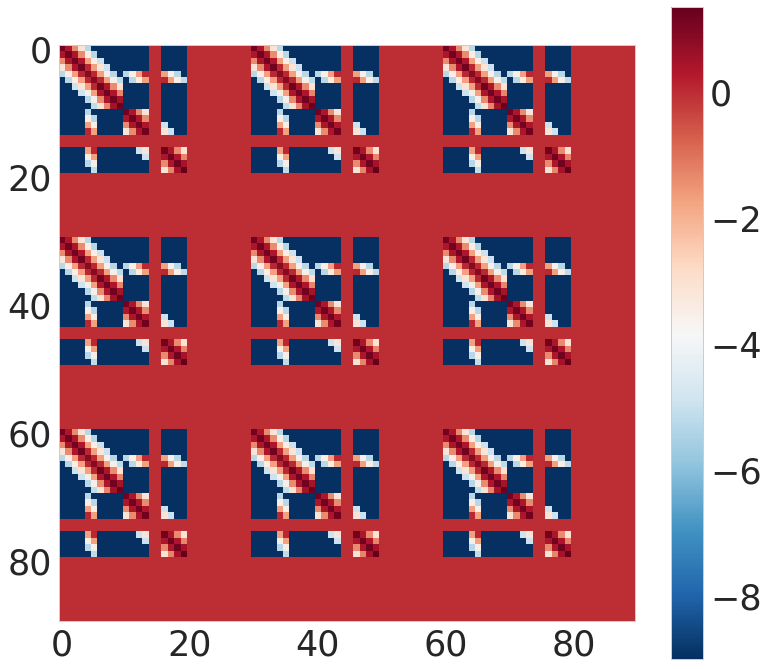

In [125]:
cmap = matplotlib.cm.RdBu_r
plt.imshow(w_total, cmap=cmap)
plt.colorbar();

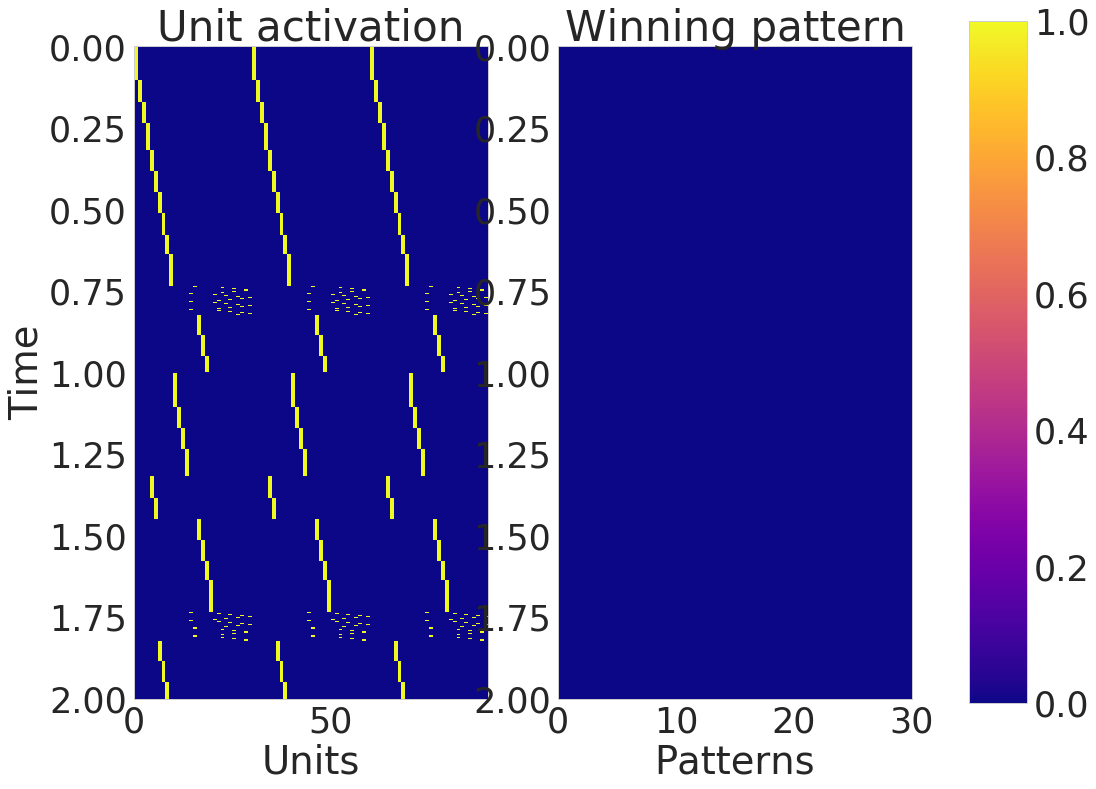

In [126]:
# Patterns parameters
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
nn.w_ampa = w_total

# Recall
T_recall = 0.975
manager.run_network_recall(T_recall=T_recall, T_cue=0.025, I_cue=nr1[0], reset=True, empty_history=True)
manager.run_network_recall(T_recall=T_recall, T_cue=0.025, I_cue=nr2[0], reset=True, empty_history=False)
if False:
    manager.run_network_recall(T_recall=T_recall, T_cue=0.025, I_cue=nr2[0], reset=True, empty_history=False)
    manager.run_network_recall(T_recall=T_recall, T_cue=0.025, I_cue=nr1[0], reset=True, empty_history=False)


plot_network_activity_angle(manager)

In [127]:
history = manager.history
nr = np.vstack((nr1, nr2))
o = history['o'][1:]
if o.shape[0] == 0:
    raise ValueError('You did not record the history of unit activities o')

distances = np.zeros((o.shape[0], nr.shape[0]))
winner = np.zeros(o.shape[0])
winner_value = np.zeros(o.shape[0])

for index, state in enumerate(o):
    # Obtain the dot product between the state of the network at each point in time and each pattern
    nominator = [np.dot(state, pattern) for pattern in nr]
    # Obtain the norm of both the state and the patterns to normalize
    denominator = [np.linalg.norm(state) * np.linalg.norm(pattern)
                   for pattern in nr]

    # Get the angles and store them
    dis = [a / b for (a, b) in zip(nominator, denominator)]
    distances[index, :] = dis
    winner[index] = np.argmax(dis)
    winner_value[index] = dis[int(winner[index])]

/home/heberto/miniconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars


In [118]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [128]:
dis_avg = running_mean(distances, 100)
#plt.matshow(dis_avg, aspect='auto')
#plt.colorbar()

In [129]:
dis_avg.shape

(39881,)

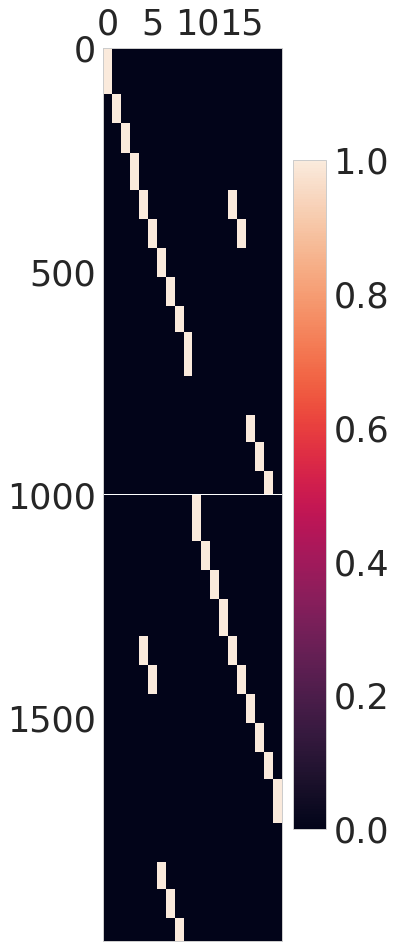

In [130]:
plt.matshow(distances, aspect='auto')
plt.colorbar()

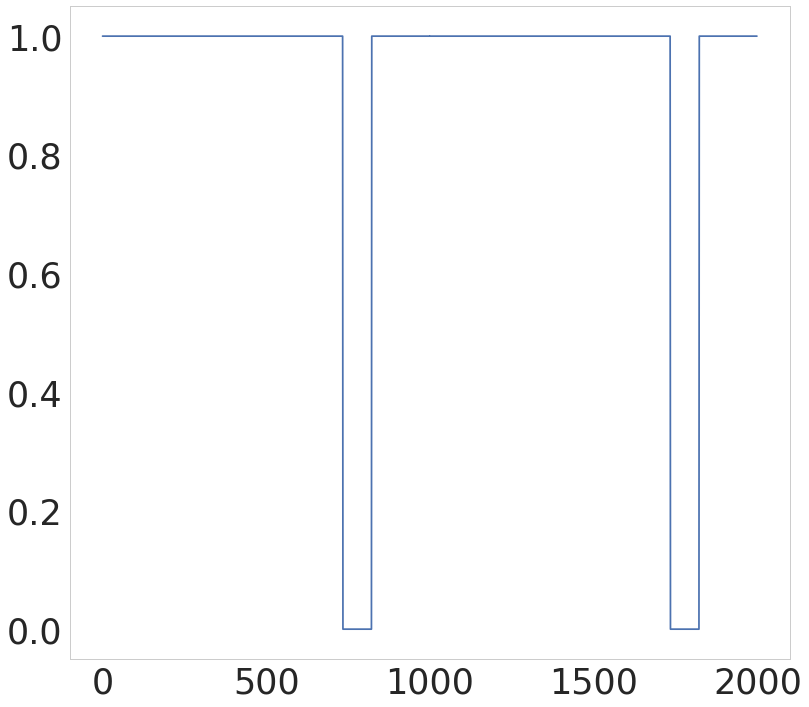

In [131]:
plt.plot(winner_value)

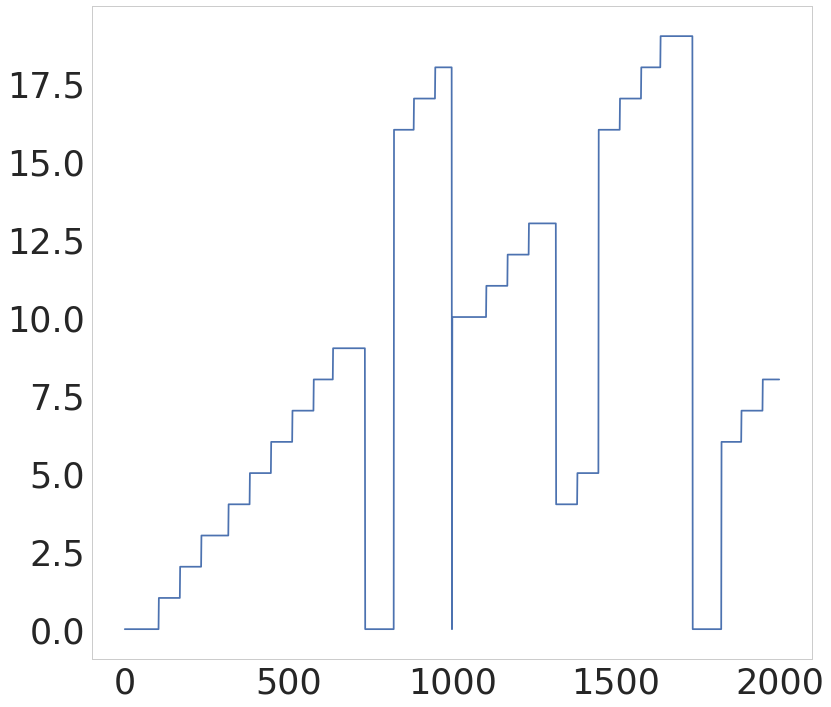

In [132]:
plt.plot(winner)

In [ ]:
(1.0, 0, 0, 1.0, 0, 0)

(0.0, 1.0,  0.0, 1.0, 0.0)

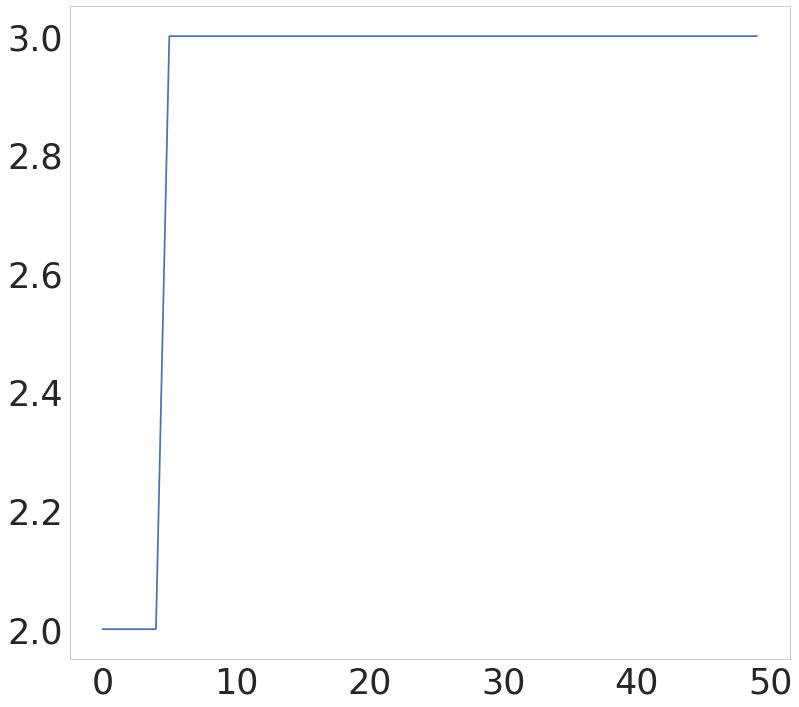

In [83]:
plt.plot(winner[230:280])

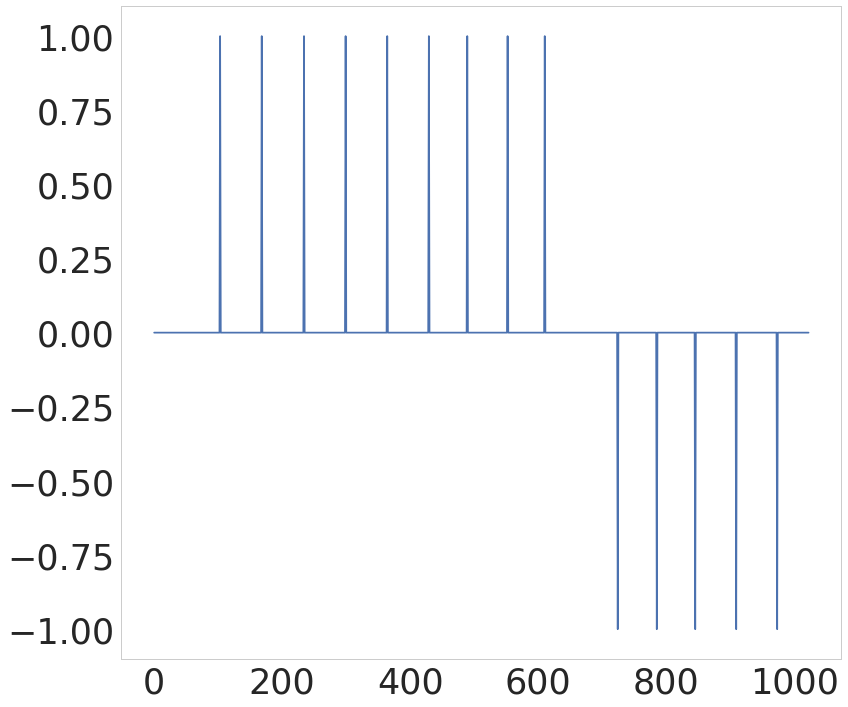

In [84]:
plt.plot(np.diff(winner))

In [23]:
success = 1 - np.any(np.diff(winner) > 1.0) 

In [24]:
def calculate_success(manager, nr1, nr2):
    history = manager.history
    nr = np.vstack((nr1, nr2))
    o = history['o'][1:]
    if o.shape[0] == 0:
        raise ValueError('You did not record the history of unit activities o')

    distances = np.zeros((o.shape[0], nr.shape[0]))
    winner = np.zeros(o.shape[0])
    winner_value = np.zeros(o.shape[0])

    for index, state in enumerate(o):
        # Obtain the dot product between the state of the network at each point in time and each pattern
        nominator = [np.dot(state, pattern) for pattern in nr]
        # Obtain the norm of both the state and the patterns to normalize
        denominator = [np.linalg.norm(state) * np.linalg.norm(pattern)
                       for pattern in nr]

        # Get the angles and store them
        dis = [a / b for (a, b) in zip(nominator, denominator)]
        distances[index, :] = dis
        winner[index] = np.argmax(dis)
        winner_value[index] = dis[int(winner[index])]
    
    # If the sequence keeps going the usual way
    success = 1 - np.any(np.diff(winner) > 1.0) 
        
    return success, distances, winner, winner_value

In [25]:
def mix_sequences(nr1, dt, training_time, inter_pulse_interval, inter_sequence_interval, 
                  epochs, tau_z_pre_ampa, tau_z_post_ampa):
    # Get the first
    timed_input = TimedInput(nr1, dt, training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)
    S = timed_input.build_timed_input()
    z_pre = timed_input.build_filtered_input_pre(tau_z_pre_ampa)
    z_post = timed_input.build_filtered_input_post(tau_z_post_ampa)


    pi1, pj1, P1 = timed_input.calculate_probabilities_from_time_signal(filtered=filtered)
    w_timed1 = get_weights_from_probabilities(pi1, pj1, P1, minicolumns, hypercolumns)
    t1 = timed_input.T_total

    # Get the second
    timed_input = TimedInput(nr2, dt, training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)
    S = timed_input.build_timed_input()
    z_pre = timed_input.build_filtered_input_pre(tau_z_pre_ampa)
    z_post = timed_input.build_filtered_input_post(tau_z_post_ampa)
    t2 = timed_input.T_total

    pi2, pj2, P2 = timed_input.calculate_probabilities_from_time_signal(filtered=filtered)
    w_timed2 = get_weights_from_probabilities(pi2, pj2, P2, minicolumns, hypercolumns)
    t_total = t1 + t2

    # Mix
    pi_total = (t1 / t_total) * pi1 + ((t_total - t1)/ t_total) * pi2
    pj_total = (t1 / t_total) * pj1 + ((t_total - t1)/ t_total) * pj2
    P_total = (t1 / t_total) * P1 + ((t_total - t1)/ t_total) * P2
    w_total, beta = get_weights_from_probabilities(pi_total, pj_total, P_total, minicolumns, hypercolumns)
    
    return w_total, beta

## An example with functions

1 1


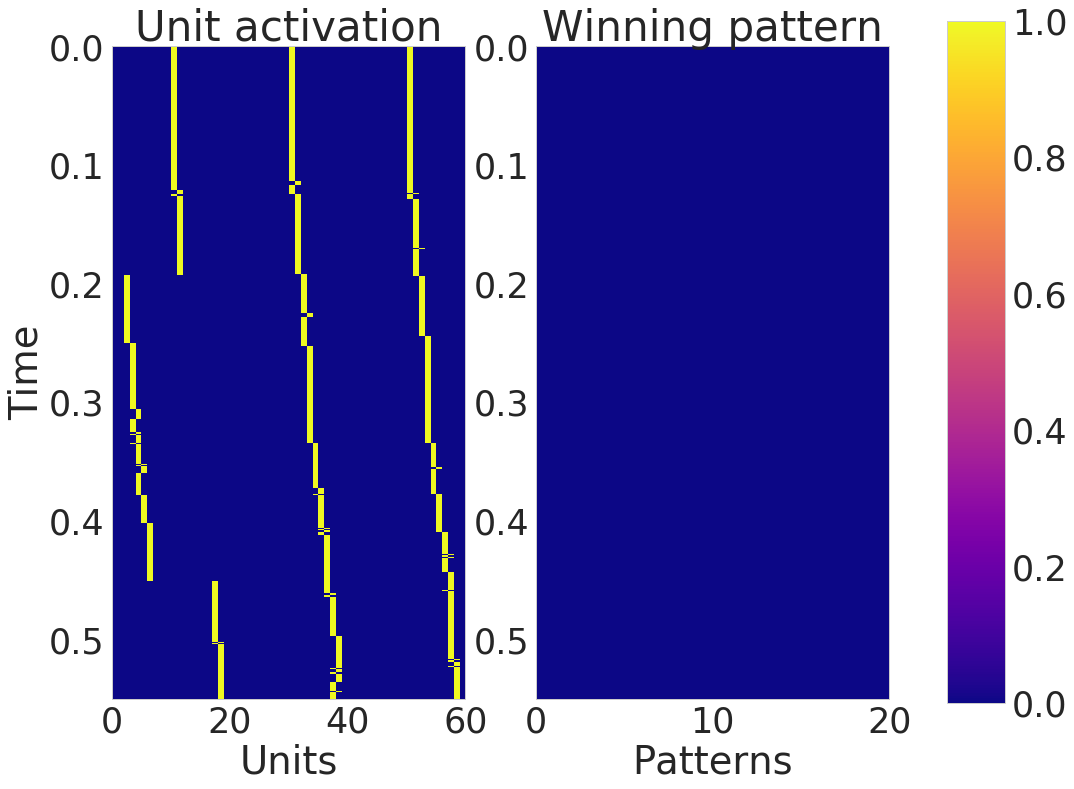

In [26]:
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 5.0
tau_m = 0.020
tau_z_pre_ampa = 0.025
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 4
minicolumns = 20
n_patterns = 20

# Manager properties
dt = 0.001
values_to_save = ['o', 'i_ampa', 'a']

# Protocol
training_time = 0.100
inter_sequence_interval = 0.0
inter_pulse_interval = 0.0
epochs = 1

# Recall
T_recall = 1.0
n = 1
T_cue = 0.050

matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
mixed_start = False
contiguous = True
s = 0.5
r = 0.5

seq1, seq2 = produce_overlaped_sequences(minicolumns, hypercolumns, n_patterns, s, r, 
                                         mixed_start=mixed_start, contiguous=contiguous)

nr1 = build_network_representation(seq1, minicolumns, hypercolumns)
nr2 = build_network_representation(seq2, minicolumns, hypercolumns)

w_total, beta = mix_sequences(nr1, dt, training_time, inter_pulse_interval, inter_sequence_interval, 
                              epochs, tau_z_pre_ampa, tau_z_post_ampa)

# Patterns parameters
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
nn.w_ampa = w_total

# Recall
manager.run_network_recall(T_recall=1.0, T_cue=0.050, I_cue=nr1[0], reset=True, empty_history=True)
success1, distances, winner, winner_value = calculate_success(manager, nr1, nr2)
manager.run_network_recall(T_recall=0.50, T_cue=0.050, I_cue=nr2[0], reset=True, empty_history=True)
success2, distances, winner, winner_value = calculate_success(manager, nr1, nr2)
print(success1, success2)
plot_network_activity_angle(manager)

In [27]:
w_diff = g_w_ampa * (w_total[1, 1] - w_total[3, 1])

In [28]:
w_diff

5.7622105914533055

# Systematic

In [38]:
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 2.5
tau_m = 0.020
tau_z_pre_ampa = 0.025
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 5
minicolumns = 20
n_patterns = 20

# Manager properties
dt = 0.001
values_to_save = ['o', 'i_ampa', 'a']

# Protocol
training_time = 0.100
inter_sequence_interval = 0.0
inter_pulse_interval = 0.0
epochs = 1

# Recall
T_recall = 1.0
n = 1
T_cue = 0.050

matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
mixed_start = False
contiguous = True
s = 0.5
r = 0.5

num = 10

s_space = np.linspace(0, 1, num=num)
r_space = np.linspace(0, 1, num=num)
success_vector = np.zeros((num, num))

for s_index, s in enumerate(s_space):
    print(s_index)
    for r_index, r in enumerate(r_space):

        seq1, seq2 = produce_overlaped_sequences(minicolumns, hypercolumns, n_patterns, s, r, 
                                                 mixed_start=mixed_start, contiguous=contiguous)

        nr1 = build_network_representation(seq1, minicolumns, hypercolumns)
        nr2 = build_network_representation(seq2, minicolumns, hypercolumns)

        w_total, beta = mix_sequences(nr1, dt, training_time, inter_pulse_interval, inter_sequence_interval, 
                                      epochs, tau_z_pre_ampa, tau_z_post_ampa)

        # Patterns parameters
        nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                          sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                          z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                          perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                          normalized_currents=normalized_currents)

        # Build the manager
        manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

        # Build the protocol for training
        nn.w_ampa = w_total
        nn.beta = beta

        # Recall
        manager.run_network_recall(T_recall=1.0, T_cue=0.050, I_cue=nr1[0], reset=True, empty_history=True)
        success1, distances, winner, winner_value = calculate_success(manager, nr1, nr2)
        manager.run_network_recall(T_recall=1.0, T_cue=0.050, I_cue=nr2[0], reset=True, empty_history=True)
        success2, distances, winner, winner_value = calculate_success(manager, nr1, nr2)
        
        success_vector[s_index, r_index] = 0.5 * (success1 + success2)

0
1
2
3
4
5
6
7
8
9


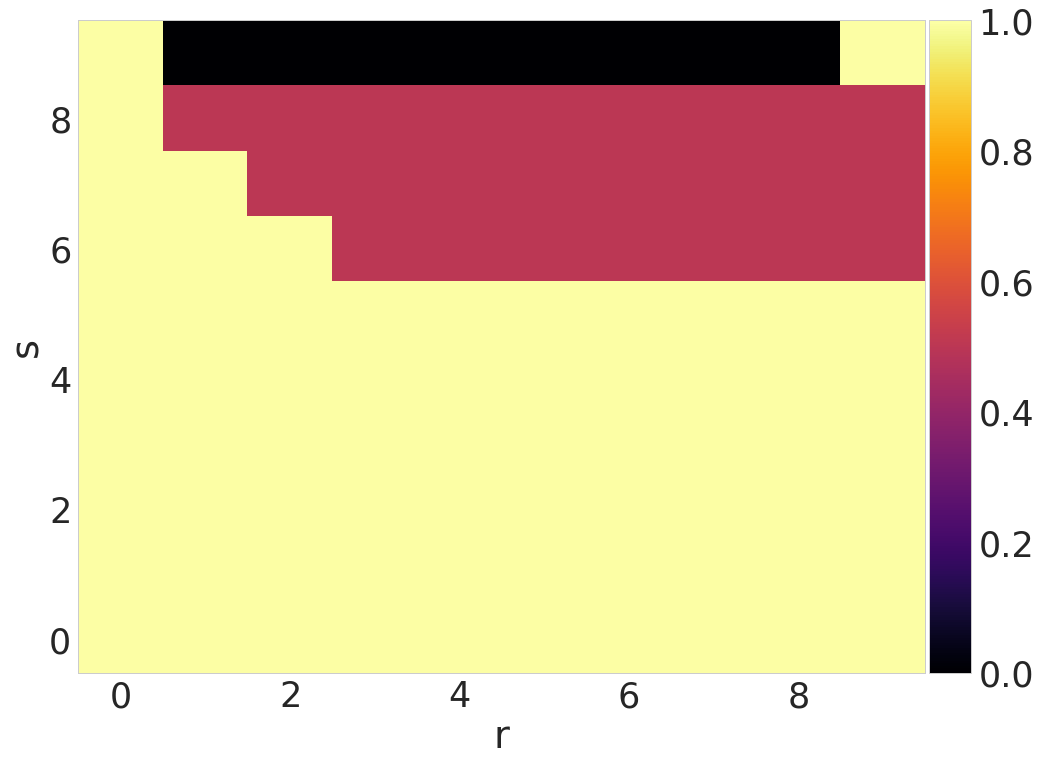

In [39]:
figsize = (16, 12)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

extent = [s_space[0], s_space[-1], r_space[0], r_space[-1]]
cmap = matplotlib.cm.inferno

ax.set_xlabel('r')
ax.set_ylabel('s')

im = ax.imshow(success_vector, origin='lower', cmap=cmap, aspect='auto')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

In [2]:
s_space

NameError: name 's_space' is not defined

In [ ]:
r